In [1]:
import pandas as pd
import geopandas as gpd

In [2]:
ny_grocery = pd.read_csv('../data/Retail_Food_Stores_NY.csv')
ny_grocery.head()

,County,License Number,Operation Type,Establishment Type,Entity Name,DBA Name,Street Number,Street Name,Address Line 2,Address Line 3,City,State,Zip Code,Square Footage,Location
0,Chenango,80033,Store,JAC,STEWARTS SHOPS CORP,STEWARTS SHOP 221,NaN,PO BOX 6 COR W&N MAIN ST,,,NEW BERLIN,NY,13411,2200,NaN
1,Clinton,95255,Store,JAC,CHURCH OIL CO INC,CHURCH MOBIL MART,NaN,EXIT 40 SPELLMAN RD,,,PLATTSBURGH,NY,12901,1000,NaN
2,Columbia,105169,Store,JAC,CUMBERLAND FARMS INC,CUMBERLAND FARMS 1592,NaN,RT 9&9J PO BOX 160,,,COLUMBIAVILLE,NY,12050,1700,NaN
3,Erie,148458,Store,JAC,DELTA SONIC CAR WASH SYSTEMS INC,KISS MART 802,NaN,RIDGE AT LANGER ST,,,WEST SENECA,NY,14224,2400,NaN
4,Greene,190145,Store,JAC,SYDJESKO LLC,MILK RUN THE,3498,RT 145,,,EAST DURHAM,NY,12423,2400,"3498 RT\nEAST DURHAM, NY 12423"


In [3]:
ny_grocery.shape

(28336, 15)

This dataset includes data for the entire state of New York, so I have to do some research in order to find out which rows (each row represents an individual grocery entity within the state) represent stores in New York City itself. I will probably make another subset of the data to represent the suburbs of New York, but I will also probably have to source data from New Jersey to get an accurate representation of those suburbs. I might also have to do that with Philadelphia.

There are a few reference points I can use within this data to locate shops in NYC:
* City
* Zip Code
* County

There are 5 counties to make up the 5 boroughs in New York, so I will be cleaning the data so that only data points from those counties appear.

In [4]:
nycounties = ['Bronx','Kings','New York','Queens','Richmond']
nyc_grocery = ny_grocery[ny_grocery['County'].isin(nycounties)]


In [5]:
nyc_grocery.head()

,County,License Number,Operation Type,Establishment Type,Entity Name,DBA Name,Street Number,Street Name,Address Line 2,Address Line 3,City,State,Zip Code,Square Footage,Location
17,Bronx,601880,Store,JADX,ROBT T COCHRAN&CO INC,ROBT T COCHRAN&CO,NaN,UNT 408-412 NYC TERMINAL MKT,,,BRONX,NY,10474,0,NaN
18,Kings,610706,Store,A,WILKLOW FRED,WILKLOW ORCHARD,NaN,COURT ST BKLYN BOROUGH HALL,,,BROOKLYN,NY,11201,200,NaN
19,New York,624199,Store,A,MESSERICH ALICE H,KNOLL KREST FARM,NaN,GREEN MARKET UNION SQUARE,,,NEW YORK,NY,10003,50,NaN
20,Queens,732805,Store,JAC,MYMUN DELI AND GROCERY CORP,MYMUN DELI AND GROCERY,163-02,HILLSIDE AVE,,,JAMAICA,NY,11432,0,"163 02 HILLSIDE AVE\nJAMAICA, NY 11432"
21,Queens,724999,Store,A,TMW GROUP INC,TMW GROUP,83-20,BROADWAY,,,ELMHURST,NY,11373,0,"83 20\nELMHURST, NY 11373"


In [14]:
nyc_grocery.to_csv(r'../data/nyc_grocery.csv')

In [6]:
nyc_grocery.shape

(13664, 15)

Now I have all the retail stores within NYC.

In [7]:
nyc_grocery.columns

Index(['County', 'License Number', 'Operation Type', 'Establishment Type',
       'Entity Name', 'DBA Name', 'Street Number', 'Street Name',
       'Address Line 2', 'Address Line 3', 'City', 'State', 'Zip Code',
       'Square Footage', 'Location'],
      dtype='object')

This dataset does not tell me much by itself, only the location of the grocery stores. So, I will need to pull up other data to find overlap between the zip codes and other factors such as vehicle access, type of grocery store, and poverty rates, as well as internet access.

In [8]:
nyc_healthy_grocery = pd.read_csv('../data/Recognized_Shop_Healthy_Stores_NYC.csv')
nyc_healthy_grocery.head()

,Store Name,Street Address,Address,Borough,Zip \nCode,Year Awarded,Program \nWave,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,Rivas Deli Grocery,651,East 183rd Street,Bronx,10458,2013,1,40.852568,-73.887484,6.0,15.0,391.0,2012464.0,2.030870e+09,Belmont
1,C-Town,1761,Southern Boulevard,Bronx,10460,2013,1,40.837267,-73.888016,3.0,17.0,155.0,2009878.0,2.029400e+09,Crotona Park East
2,La India Mini Market,1942,Marmion Avenue,Bronx,10460,2013,1,40.842942,-73.887136,6.0,17.0,36502.0,2010156.0,2.029600e+09,East Tremont
3,Los Hermanos,2019,Vyse Avenue,Bronx,10460,2013,1,40.842391,-73.881835,6.0,17.0,363.0,2013203.0,2.031270e+09,East Tremont
4,Price Choice Food Market,820,East 180th Street,Bronx,10460,2013,1,40.846173,-73.884871,6.0,15.0,36501.0,2012955.0,2.031080e+09,East Tremont


This is a list of healthy grocery stores that are in New York City. I can see if there's overlap by region now!
* I can't do this until I learn mapping in Python LMFAOOOO

# FB

* We will start to cover using GeoPandas and doing some geolocated analysis soon.

* But here are a few steps to go from the Longitude and Latitude columns in your data sheet to a `GeoDataFrame` that can be plotted.

In [9]:
lon = nyc_healthy_grocery['Longitude']
lat = nyc_healthy_grocery['Latitude']

geom=gpd.points_from_xy(lon,lat)

nyc_healthy_grocery_gdf = gpd.GeoDataFrame(nyc_healthy_grocery, geometry=geom)

In [10]:
nyc_healthy_grocery_gdf.plot(figsize=(10,10))

<AxesSubplot:>

In [11]:
boroughs_url = 'https://raw.githubusercontent.com/dwillis/nyc-maps/master/boroughs.geojson'
boroughs_gdf = gpd.read_file(boroughs_url)

<AxesSubplot:>

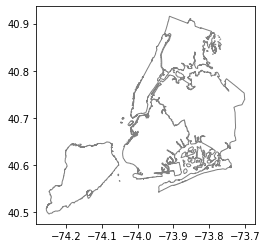

In [12]:
boroughs_gdf.plot(color='white', edgecolor='gray')

<AxesSubplot:>

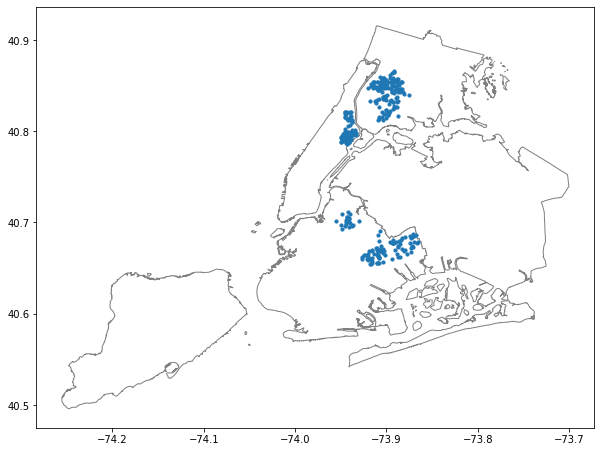

In [13]:
base=boroughs_gdf.plot(color='white', edgecolor='gray', figsize=(10,10))
nyc_healthy_grocery_gdf.plot(ax=base, markersize=10)